In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

np.random.seed(42)

import tensorflow as tf 
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
 

In [3]:
mass = pd.read_pickle('./data/03_dummy_df.pickle') 
sent = pd.read_pickle('./data/03_mass_notes_sentiment_analysis.pkl')

In [5]:
mass.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions,start_date,end_date,target
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,1,0,0,1,0,0,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]"
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,0,0,0,1,0,0,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]"
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,0,0,0,1,0,0,0,1990-07-01,1990-07-01,"[0, 0, 0, 0, 1, 0, 0]"
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,0,1,0,0,0,0,0,1990-07-12,1990-09-06,"[0, 1, 0, 0, 0, 0, 0]"
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,0,0,0,1,0,0,0,1990-08-14,1990-08-15,"[1, 1, 0, 1, 0, 0, 0]"


In [10]:
mass.shape

(15225, 228)

In [7]:
sent.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,price increases_tax_policy,removal_of_politician,social_restrictions,start_date,end_date,notes_clean,neg,neu,pos,compound
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,0,0,0,1990-01-15,1990-01-15,canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,0,0,0,1990-06-25,1990-06-25,protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,0,0,0,1990-07-01,1990-07-01,"the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,0,0,0,1990-07-12,1990-09-06,canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,0,0,0,1990-08-14,1990-08-15,protests were directed against the state due t...,0.226,0.677,0.098,-0.5267


In [9]:
sent = sent[['notes_clean', 'neg', 'neu', 'pos', 'compound']]
sent.head()

,notes_clean,neg,neu,pos,compound
0,canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176
1,protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000
2,"the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003
3,canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711
4,protests were directed against the state due t...,0.226,0.677,0.098,-0.5267


In [11]:
sent.shape

(15179, 5)

In [17]:
mass.dropna(subset=['notes'], inplace=True)
mass.shape

(15179, 228)

In [19]:
mass = pd.concat([mass, sent], axis=1, join='inner')
mass.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,removal_of_politician,social_restrictions,start_date,end_date,target,notes_clean,neg,neu,pos,compound
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,0,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,0,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,0,0,1990-07-01,1990-07-01,"[0, 0, 0, 0, 1, 0, 0]","the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,0,0,1990-07-12,1990-09-06,"[0, 1, 0, 0, 0, 0, 0]",canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,0,0,1990-08-14,1990-08-15,"[1, 1, 0, 1, 0, 0, 0]",protests were directed against the state due t...,0.226,0.677,0.098,-0.5267


In [20]:
mass.to_csv('./data/mass_mobile.csv')

In [38]:
mass.columns[0:20]

Index(['id', 'country', 'ccode', 'region', 'protestnumber',
       'protesterviolence', 'location', 'protesteridentity', 'sources',
       'notes', 'protester_id_type', 'partipants_number',
       'protest_size_category', 'pop_male', 'pop_female', 'pop_total',
       'pop_density', 'prosperity_2020', 'country_Afghanistan',
       'country_Albania'],
      dtype='object')

In [39]:
mass.columns[200:228]

Index(['protester_id_type_locals_residents',
       'protester_id_type_pensioners_retirees',
       'protester_id_type_political_group', 'protester_id_type_prisoners',
       'protester_id_type_protestors_generic',
       'protester_id_type_religious_group',
       'protester_id_type_soldiers_veterans',
       'protester_id_type_students_youth',
       'protester_id_type_victims_families', 'protester_id_type_women',
       'protester_id_type_workers_unions', 'arrests', 'accomodation',
       'beatings', 'crowddispersal', 'ignore', 'killings', 'shootings',
       'labor_wage_dispute', 'land_farm_issue', 'police_brutality',
       'political_behavior_process', 'price increases_tax_policy',
       'removal_of_politician', 'social_restrictions', 'start_date',
       'end_date', 'target'],
      dtype='object')

In [27]:
mass['protester_id_type'].unique()

array(['workers_unions', 'students_youth', 'political_group',
       'ethnic_group', 'locals_residents', 'pensioners_retirees',
       'protestors_generic', 'civil_human_rights', 'women',
       'religious_group', 'soldiers_veterans', 'victims_families',
       'prisoners'], dtype=object)

In [66]:
mass['partipants_number']

0        1000
1        1000
2         500
3         100
4         950
         ... 
15220     100
15221    1000
15222      50
15223      50
15224     100
Name: partipants_number, Length: 15225, dtype: int64

In [219]:
X = mass.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
       'notes', 'protester_id_type', 'protest_size_category', 'start_date',
       'end_date', 'target'])
#y = mass['target']
y = np.array(mass[['arrests', 'accomodation', 'beatings',
       'crowddispersal', 'ignore', 'killings', 'shootings']])

In [220]:
y

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [221]:
X

,id,protestnumber,protesterviolence,partipants_number,pop_male,pop_female,pop_total,pop_density,prosperity_2020,country_Afghanistan,...,ignore,killings,shootings,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions
0,201990001,1,0.0,1000,13656.649,13884.674,27541.323,3.029,79.819703,0,...,1,0,0,1,0,0,1,0,0,0
1,201990002,2,0.0,1000,13656.649,13884.674,27541.323,3.029,79.819703,0,...,1,0,0,0,0,0,1,0,0,0
2,201990003,3,0.0,500,13656.649,13884.674,27541.323,3.029,79.819703,0,...,1,0,0,0,0,0,1,0,0,0
3,201990004,4,1.0,100,13656.649,13884.674,27541.323,3.029,79.819703,0,...,0,0,0,0,1,0,0,0,0,0
4,201990005,5,1.0,950,13656.649,13884.674,27541.323,3.029,79.819703,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15220,9102014001,1,1.0,100,4050.613,3896.120,7946.733,17.548,46.065203,0,...,0,0,1,0,0,0,1,0,0,0
15221,9102016001,1,1.0,1000,4219.461,4052.305,8271.766,18.266,46.065203,0,...,0,1,1,0,0,0,0,0,1,0
15222,9102017001,1,0.0,50,4305.516,4132.522,8438.038,18.633,46.065203,0,...,0,0,0,0,1,0,1,0,0,0
15223,9102017002,2,1.0,50,4305.516,4132.522,8438.038,18.633,46.065203,0,...,0,0,0,0,0,0,1,0,0,0


In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [309]:
X_train

,id,protestnumber,protesterviolence,partipants_number,pop_male,pop_female,pop_total,pop_density,prosperity_2020,country_Afghanistan,...,ignore,killings,shootings,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions
14823,8201999007,7,0.0,200,11539.672,11121.621,22661.293,68.974,67.491327,0,...,0,0,0,0,0,1,0,0,0,0
8260,4392002001,1,0.0,2000,6047.905,6245.192,12293.097,44.931,44.824098,0,...,1,0,0,0,0,0,0,1,0,0
14949,8302014004,4,0.0,100,2891.999,2633.629,5525.628,7893.754,79.512408,0,...,1,0,0,0,0,0,1,1,0,0
11334,6451995001,1,1.0,1000,10159.693,9989.649,20149.342,46.393,44.557454,0,...,0,1,1,0,0,1,0,0,0,0
1458,1102014001,1,1.0,500,380.976,382.395,763.371,3.878,55.871701,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,3252005006,6,1.0,40000,28295.735,29985.474,58281.209,198.141,71.833298,0,...,0,0,0,0,1,0,0,0,0,0
13418,7502006001,1,1.0,100,606386.475,559099.816,1165486.291,391.999,53.640353,0,...,0,1,0,0,1,0,0,0,0,0
5390,3422018004,4,0.0,25000,4313.121,4489.620,8802.741,100.649,62.470991,0,...,1,0,0,0,0,0,1,0,1,0
860,932015002,2,0.0,50,3067.180,3156.054,6223.234,51.714,51.380974,0,...,1,0,0,0,0,0,1,0,0,0


In [310]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [311]:
n_input = Z_train.shape[1]
n_output = y.shape[1]
print(f'Number of inputs: {Z_train.shape[1]}')
print(f'Number of outputs: {y.shape[1]}')

Number of inputs: 216
Number of outputs: 7


In [312]:
model = Sequential()
model.add(Dense(n_input, input_dim=n_input, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(n_output, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(Z_train, y_train)

357/357 [==============================] - 0s 667us/step - loss: 0.2706 - accuracy: 0.6815


In [313]:
pred = model.predict(Z_test)
x_pred = model.predict(Z_train)
y_pred = pred.round()
y_pred

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [317]:
mass['prediction_probs'] = pd.DataFrame(pred)

In [318]:
mass['prediction_probs']

0        0.003750
1        0.006964
2        0.002190
3        0.003250
4        0.002026
           ...   
15220         NaN
15221         NaN
15222         NaN
15223         NaN
15224         NaN
Name: prediction_probs, Length: 15225, dtype: float32

In [319]:
metrics.r2_score(y_test, y_pred)


0.9679445813677632

In [320]:
metrics.accuracy_score(y_test, y_pred)

0.9821381665353297

In [270]:
model.evaluate(Z_test, y_test)

119/119 [==============================] - 0s 399us/step - loss: 0.0248 - accuracy: 0.8660


[0.024751877412199974, 0.8660362362861633]

In [272]:
history = model.fit(Z_train, 
                   y_train, 
                   validation_data=(Z_test, y_test), 
                   epochs=50, 
                   batch_size=None, 
                   verbose=2)

Epoch 1/50
357/357 - 0s - loss: 0.0120 - accuracy: 0.8756 - val_loss: 0.0084 - val_accuracy: 0.8797
Epoch 2/50
357/357 - 0s - loss: 0.0041 - accuracy: 0.8797 - val_loss: 0.0049 - val_accuracy: 0.8928
Epoch 3/50
357/357 - 0s - loss: 0.0020 - accuracy: 0.8723 - val_loss: 0.0031 - val_accuracy: 0.8747
Epoch 4/50
357/357 - 0s - loss: 0.0012 - accuracy: 0.8748 - val_loss: 0.0024 - val_accuracy: 0.8792
Epoch 5/50
357/357 - 0s - loss: 9.4389e-04 - accuracy: 0.8737 - val_loss: 0.0020 - val_accuracy: 0.8618
Epoch 6/50
357/357 - 0s - loss: 7.7941e-04 - accuracy: 0.8711 - val_loss: 0.0017 - val_accuracy: 0.8779
Epoch 7/50
357/357 - 0s - loss: 5.4018e-04 - accuracy: 0.8758 - val_loss: 0.0014 - val_accuracy: 0.8618
Epoch 8/50
357/357 - 0s - loss: 3.3415e-04 - accuracy: 0.8762 - val_loss: 0.0013 - val_accuracy: 0.8576
Epoch 9/50
357/357 - 0s - loss: 2.6666e-04 - accuracy: 0.8662 - val_loss: 0.0011 - val_accuracy: 0.8613
Epoch 10/50
357/357 - 0s - loss: 1.4454e-04 - accuracy: 0.8757 - val_loss: 0.001

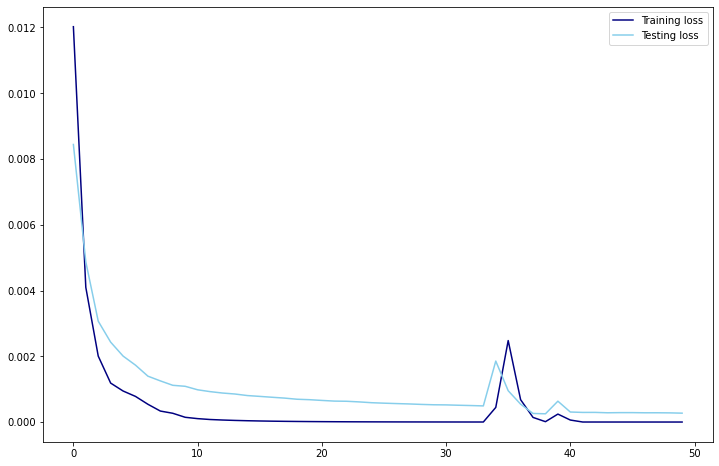

In [273]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();